# Convolutional Neural Network for Image Classification

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Visualizing the Image Data

In [17]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [18]:
x_train.shape   # 60000 images 28 by 28 pixel

(60000, 28, 28)

In [19]:
single_image = x_train[0]

In [20]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

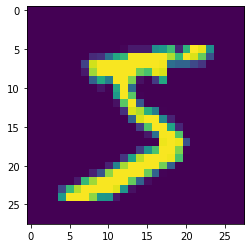

In [21]:
plt.imshow(single_image)

### PreProcessing Data

## Labels

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train.shape

(60000,)

In [25]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [26]:
y_cat_train.shape

(60000, 10)

In [27]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
x_train.shape

(60000, 28, 28)

### Processing X Data
We should normalize the X data

In [29]:
single_image.max()

255

In [30]:
single_image.min()

0

In [32]:
x_train = x_train/255
x_test = x_test/255

In [33]:
scaled_single = x_train[0]

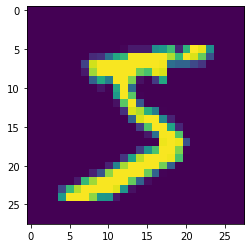

In [34]:
plt.imshow(scaled_single)

### Reshaping the Data

In [35]:
x_train.shape

(60000, 28, 28)

In [36]:
x_test.shape

(10000, 28, 28)

In [37]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [39]:
print(x_train.shape)
print('\n')
print(x_test.shape)

(60000, 28, 28, 1)


(10000, 28, 28, 1)


### Training the Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [42]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten Images from 28 by 28 to 764 
model.add(Flatten())

# 128 Neurons in Dense Hidden Layer
model.add(Dense(128, activation='relu'))

# Las Layer is the Classifier, thus 10 classes
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [46]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2868 - accuracy: 0.9143 - val_loss: 0.0522 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0463 - val_accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.0449 - val_accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0399 - val_accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0556 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0538 - val_accuracy: 0.9851


## Evaluate the Model

In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
losses = pd.DataFrame(model.history.history)

In [49]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.141446,0.957867,0.052217,0.9832
1,0.047436,0.985167,0.046316,0.9839
2,0.031114,0.990100,0.044871,0.9846
3,0.021058,0.993200,0.039890,0.9870
4,0.015108,0.995200,0.055600,0.9834
5,0.010218,0.996700,0.053797,0.9851


<AxesSubplot:>

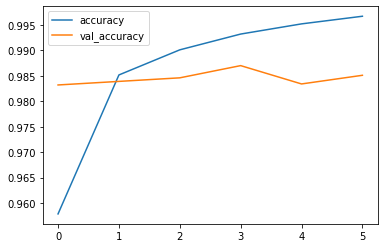

In [50]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

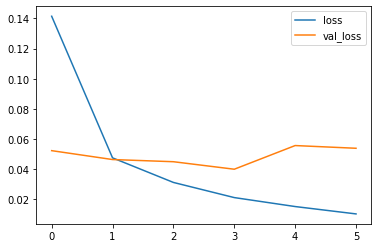

In [51]:
losses[['loss','val_loss']].plot()

In [53]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.053797028958797455, 0.9850999712944031]


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
predictions = model.predict_classes(x_test)

C:\Users\JUHI\anaconda3\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [56]:
y_cat_test.shape

(10000, 10)

In [57]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [58]:
predictions[0]

7

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.95      1.00      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [60]:
confusion_matrix(y_test,predictions)

array([[ 978,    1,    0,    1,    0,    0,    0,    0,    0,    0],
       [   3, 1131,    0,    1,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1020,    5,    0,    0,    0,    3,    1,    0],
       [   0,    0,    1, 1008,    0,    0,    0,    0,    1,    0],
       [   2,    0,    4,    0,  965,    0,    3,    0,    0,    8],
       [   1,    0,    1,   19,    0,  870,    1,    0,    0,    0],
       [   4,    2,    1,    0,    3,    2,  944,    0,    2,    0],
       [   0,    4,    8,    1,    0,    0,    0, 1013,    1,    1],
       [   5,    2,    8,    9,    1,    2,    0,    4,  940,    3],
       [   2,    3,    0,   12,    6,    2,    0,    2,    0,  982]],
      dtype=int64)

In [61]:
import seaborn as sns

<AxesSubplot:>

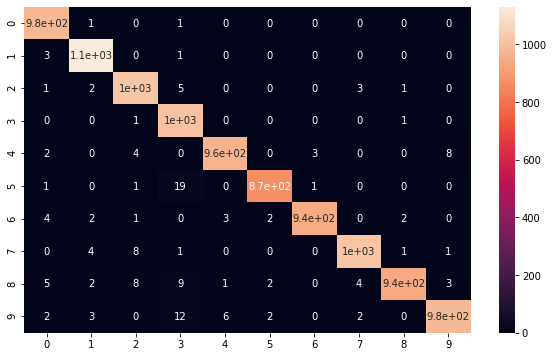

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

## Predicting a given image

In [63]:
my_number = x_test[0]

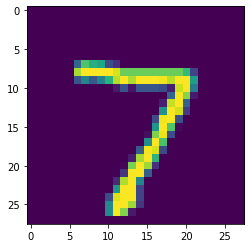

In [64]:
plt.imshow(my_number.reshape(28,28))

In [65]:
model.predict_classes(my_number.reshape(1,28,28,1))

C:\Users\JUHI\anaconda3\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7], dtype=int64)